<a href="https://colab.research.google.com/github/hmurdock21/superlexis/blob/master/Nexis_Lexis_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from striprtf.striprtf import rtf_to_text
import re
import os
import locale
from datetime import datetime
locale.setlocale(locale.LC_TIME, "nl_NL")
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
plain_texts = []
folder_path = "data"  ### There needs to be folder in the working directory with the title "data" that has separated rtf.file
file_names = os.listdir(folder_path)
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, "r", encoding = 'latin1') as file:
        text = file.read()
        text = rtf_to_text(text)
        plain_texts.append(text)

In [ ]:
dct = {}
for index, t in enumerate(plain_texts):
    dct[str(index)] = {}

    meta = re.search(r"^(.*?)Copyright", t, re.DOTALL) #### Can/must be checked for all variables
    section = re.search(r"Section:(.*?)\n", t)
    length = re.search(r"Length:(.*?)\n", t)
    byline = re.search(r"Byline:(.*?)\n", t)
    highlight = re.search(r"Highlight:(.*?)\n", t)
    body = re.search(r"Body(.*?)Load-Date:", t.replace("\n", " "))

    if meta:
        meta_data = meta.group(1).strip().split("\n")
        dct[str(index)]["headline"] = meta_data[0]
        dct[str(index)]["news_source"] = meta_data[1]
        dct[str(index)]["datePublished"] = meta_data[2]
        if len(meta_data) > 3:
            dct[str(index)]["region"] = meta_data[3]
    if section:
        dct[str(index)]["articleSection"] = section.group(1).strip()
    if length:
        dct[str(index)]["length"] = length.group(1).strip()
    if byline:
        dct[str(index)]["byline"] = byline.group(1).strip()
    if highlight:
        dct[str(index)]["highlight"] = highlight.group(1).strip()
    if body:
        dct[str(index)]["text"] = body.group(1).strip()

In [ ]:
df_print = pd.DataFrame(dct).transpose()

df_print

,headline,news_source,datePublished,region,articleSection,length,byline,highlight,text
0,"Transition écologique A Muttersholtz, les bien...",,Libération,jeudi 14 mars 2024,STORIES; Pg. 12,1800 words,Olivier MonodJulie Renson MiquelPascal Bastien...,"Autoproduction énergétique, lutte contre l'art...",«La hausse des prix de l'énergiene pèse pas su...
1,"CYCLISME Christian Prudhomme, un roi bien en ...",,Libération,jeudi 13 juillet 2023,STORIES; Pg. 19,2026 words,Romain BoulhoPascal Aimar. Tendance floue; Rom...,"Chef d'entreprise, figure patrimoniale, élu en...",L'alerte fut donnée début juillet sur Facebook...
2,Les visiteurs mis à contribution pour protég...,Le Figaro,Samedi 8 Juillet 2023,NaN,SOCIÉTÉ; Pg. 11; N° 24534,811 words,"Taupin, Astrid",NaN,"ÉROSION, pollution, flore dégradée... La liste..."
3,"TROYES, LA PETITE CITÉ CHAMPENOISE QUI PÉTILLE...",Le Figaro,Vendredi 17 Février 2023,NaN,SCOPE; Pg. 37; N° 24414,1993 words,"Carillet, Jean-Bernard",NaN,C'est comme si elle avait retrouvé tout son éc...
4,La capitale asphyxiée par les travaux; Par mil...,Le Figaro,Samedi 15 Juin 2019,NaN,SOCIÉTÉ; Pg. 10; N° 23276,688 words,"Négroni, Angélique",NaN,URBANISME Alors que le trafic automobile ne c...
...,...,...,...,...,...,...,...,...,...
877,"LES ROLLING STONES, DIEUX DU STADE; APRÈS LOND...",Le Figaro,Vendredi 11 Juin 2021,NaN,CULTURE; &vous; Pg. 35; N° 23889,671 words,"Nuc, Olivier",NaN,Malgré la pandémie qui prive les rock stars in...
878,Travelling sur l'attentat de Sarajevo; VELIBOR...,Le Figaro,Jeudi 31 Mai 2012,NaN,CRITIQUE; Pg. 2; N° 21097,423 words,"Dargent, Françoise",NaN,ON N'IGNORE rien des effets de l'attentat de S...
879,Incendie à Vaulx-en-Velin : «On veut savoir co...,,Libération,samedi 17 décembre 2022,EXPRESSO; Pg. 12,882 words,"Maïté Darnault,; Maïté Darnault, Envoyée spéci...",L'origine du drame qui a fait dix morts dont c...,Ce vendredi aurait dû être un prélude paisible...
880,"TRANSPORTS En un an, il a conquis 200 000 abon...",Le Figaro,Mercredi 25 Juin 2008,NaN,RECTO; Verso; Pg. 2; N° 19875,1240 words,"Tabet, Marie-Christine",NaN,C'est un coup marketing incontestable. Un de c...


In [ ]:
df_print.to_csv("dataset2.csv", encoding='utf-8', index=False)



Structural topic modelling

In [4]:
# Install rpy2 package
!pip install rpy2

# Load the rpy2 extension
%load_ext rpy2.ipython


In [5]:
# Install R packages
%%R
install.packages('stm')
install.packages('tidyverse')
install.packages('tm')
install.packages('quanteda')


(as ‘lib’ is unspecified)

























































































	‘/tmp/RtmpdeAk2i/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdeAk2i/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpdeAk2i/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdeAk2i/downloaded_packages’



In [9]:
!pip install rpy2
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
%%R
install.packages('stm')
install.packages('tidyverse')
install.packages('tm')
install.packages('quanteda')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdeAk2i/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdeAk2i/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdeAk2i/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpdeAk2i/downloaded_packages’



In [13]:
%%R

library(quanteda)
library(stm)
library(tidyverse)

# Load the cleaned data
df <- read.csv('supreme_data_ideology.csv')

# Create a corpus
corpus <- corpus(df, text_field = 'translated')

# Tokenize the corpus
tokens <- tokens(corpus, remove_punct = TRUE, remove_symbols = TRUE)

# Create a document-feature matrix
dfm <- dfm(tokens)

# Remove stopwords
dfm <- dfm_remove(dfm, pattern = stopwords("english"))

# Convert to STM format
stm_data <- convert(dfm, to = "stm", docvars = df)

# Fit the STM model
model <- stm(documents = stm_data$documents, vocab = stm_data$vocab, K = 20, prevalence = ~ political_orientation, data = stm_data$meta)

# Summary of the model
summary(model)


 Papers, resources, and other materials at structuraltopicmodel.com



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	....................
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
...................................................................................................

In [15]:
%%R
summary(model)


A topic model with 20 topics, 1379 documents and a 36938 word dictionary.
Topic 1 Top Words:
 	 Highest Prob: bicycle, cycling, cycle, also, can, bicycles, people 
 	 FREX: e-bike, percent, copenhagen, e-bikes, nijmegen, heijkoop, netherlands 
 	 Lift: heijkoop, #ridesolo, 0.19, 1,207, 1,295,484, 1,496, 1,670 
 	 Score: bicycle, utrecht, e-bike, heijkoop, cycling, e-bikes, gazelle 
Topic 2 Top Words:
 	 Highest Prob: also, city, new, municipality, residents, bridge, van 
 	 FREX: ij, tunnel, pta, bridge, d'hooghe, committee, ferry 
 	 Lift: hutten, langeveld, wijngaard, pta, 030709bin_utrecht, 0307bin2, 1,096,164 
 	 Score: ij, pta, allotment, d'hooghe, utrecht, ferry, rotte 
Topic 3 Top Words:
 	 Highest Prob: government, elections, council, political, european, party, also 
 	 FREX: bildu, spending, communities, podemos, feijóo, financing, defense 
 	 Lift: 1,050, 1,950, 12.8, 122,000, 13.3, 134,658, 14.9 
 	 Score: bildu, feijóo, pp, psoe, montero, podemos, cpff 
Topic 4 Top Words:


In [16]:
%%R
label_topics <- labelTopics(model, n = 10)
print(label_topics)


Topic 1 Top Words:
 	 Highest Prob: bicycle, cycling, cycle, also, can, bicycles, people, says, cyclists, netherlands 
 	 FREX: e-bike, percent, copenhagen, e-bikes, nijmegen, heijkoop, netherlands, cycling, schools, school 
 	 Lift: heijkoop, #ridesolo, 0.19, 1,207, 1,295,484, 1,496, 1,670, 1.65, 1009bin1utrecht, 105,000 
 	 Score: bicycle, utrecht, e-bike, heijkoop, cycling, e-bikes, gazelle, velo-city, fietsmaatjes, regenboog 
Topic 2 Top Words:
 	 Highest Prob: also, city, new, municipality, residents, bridge, van, can, amsterdam, now 
 	 FREX: ij, tunnel, pta, bridge, d'hooghe, committee, ferry, connection, java, allotment 
 	 Lift: hutten, langeveld, wijngaard, pta, 030709bin_utrecht, 0307bin2, 1,096,164, 1,250, 1,393, 10,700 
 	 Score: ij, pta, allotment, d'hooghe, utrecht, ferry, rotte, java, sporenburg, gardeners 
Topic 3 Top Words:
 	 Highest Prob: government, elections, council, political, european, party, also, pp, year, cycle 
 	 FREX: bildu, spending, communities, podemos

In [18]:
%%R
effect <- estimateEffect(1:20 ~ political_orientation, model, meta = stm_data$meta)
summary(effect)



Call:
estimateEffect(formula = 1:20 ~ political_orientation, stmobj = model, 
    metadata = stm_data$meta)


Topic 1:

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.042836   0.008589   4.987 6.91e-07 ***
political_orientationRight 0.027066   0.011454   2.363   0.0183 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.025842   0.008375   3.086  0.00207 ** 
political_orientationRight 0.072312   0.011993   6.030 2.11e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.041021   0.006662   6.157  9.7e-10 ***
political_orientationRight -0.015037   0.008703  -1.728   0.0843 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

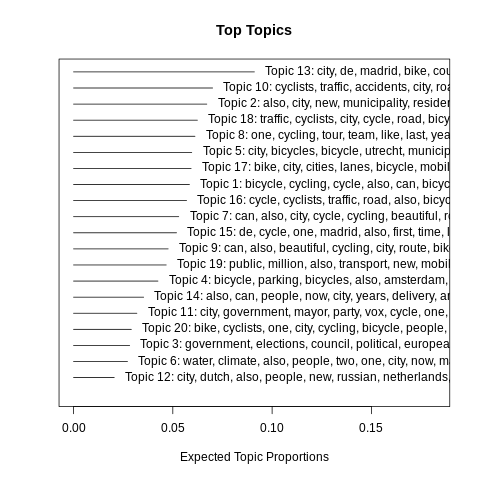

In [19]:
%%R
plot(model, type = "summary", n = 10)


In [24]:
%%R

# Install igraph package
install.packages("igraph")

# Load igraph package
library(igraph)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpdeAk2i/downloaded_packages’

Attaching package: ‘igraph’



    %--%, union



    as_data_frame, groups, union



    compose, simplify



    crossing



    as_data_frame



    decompose, spectrum



    union




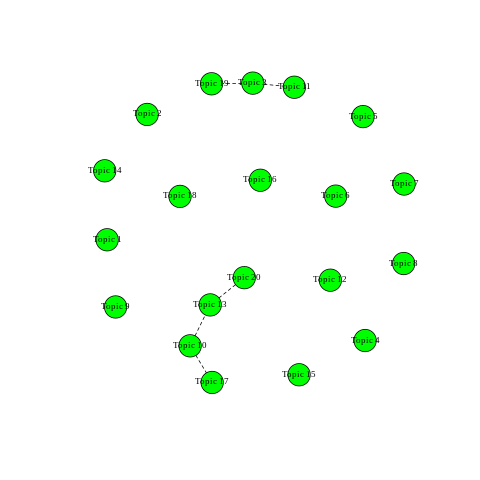

In [25]:
%%R

# Calculate topic correlation
topic_correlation <- topicCorr(model)

# Plot topic correlation
plot(topic_correlation)


In [27]:
%%R

# Re-running with 10 topics instead of 20
# Fit the STM model
model <- stm(documents = stm_data$documents, vocab = stm_data$vocab, K = 10, prevalence = ~ political_orientation, data = stm_data$meta)

# Summary of the model
summary(model)


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	..........
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
..........................................................................................................
Completed E-Step (1 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -8.888) 
..........................................................................................................
Completed E-Step (1 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -8.109, relative change = 8.758e-02) 
..........................................................................................................
Completed E-Step (1 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -8.07

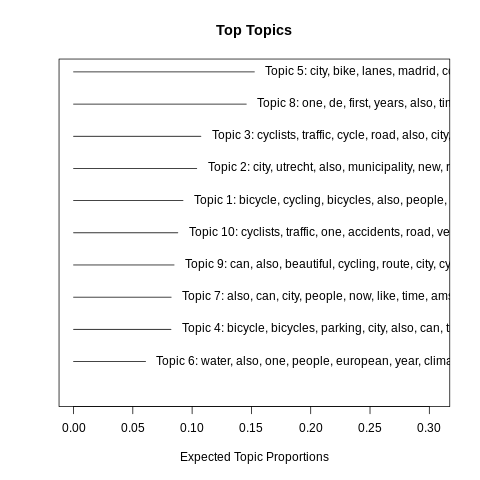

In [28]:
%%R
plot(model, type = "summary", n = 10)

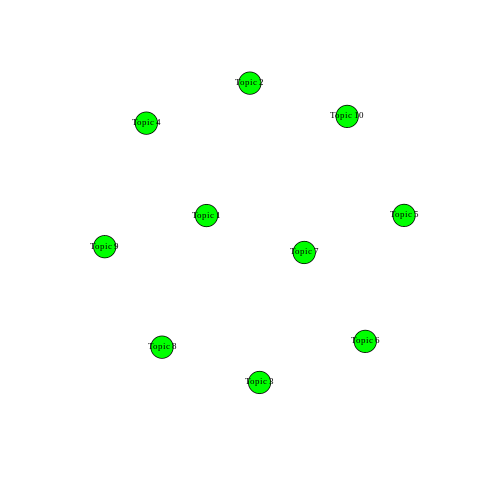

In [29]:
%%R

# Calculate topic correlation
topic_correlation <- topicCorr(model)

# Plot topic correlation
plot(topic_correlation)